In [1]:
# %load D:/BUDS_MID/__init__.py
"""
Created on Wed Feb 19 16:21:00 2020

@author: cmchico

usual imports
"""

import os
import pandas as pd
import numpy as np

pd.options.display.max_rows = 100
pd.set_option('display.float_format', '{:.0f}'.format)

from time import time
from datetime import timedelta

import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt

### 1: Compare derived cog methodology to cog values

In [3]:
raw  = "D:/BUDS OUT/ATM TSR/"

In [4]:
start = time()
cog = pd.read_excel('D:/BUDS/ATM Daily Withdrawals/Amout and Vol per TID 2019.xlsx')
print(timedelta(seconds=time()-start))

0:03:05.430565


In [5]:
cog.info()
cog.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011797 entries, 0 to 1011796
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Year               1011797 non-null  int64         
 1   Date               1011797 non-null  datetime64[ns]
 2   Manage Group       1011797 non-null  object        
 3   Withdrawal         1011797 non-null  int64         
 4   Deposit            1011797 non-null  int64         
 5   Off Us Withdrawal  1011797 non-null  int64         
 6     TID              1011797 non-null  int64         
 7   Checking           1011797 non-null  int64         
 8   Type               1011797 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 69.5+ MB


Index(['Year', 'Date', 'Manage Group', 'Withdrawal', 'Deposit',
       'Off Us Withdrawal', '  TID   ', 'Checking', 'Type'],
      dtype='object')

In [6]:
cog.drop(columns=['Year','Manage Group','Deposit','Checking', 'Type'], inplace=True)
cog.rename(columns={'Date':'DATE','  TID   ':'TID','Withdrawal':'WDL_AMT','Off Us Withdrawal':'WDL_AMT_OFFUS'}, inplace=True)

In [7]:
cog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011797 entries, 0 to 1011796
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   DATE           1011797 non-null  datetime64[ns]
 1   WDL_AMT        1011797 non-null  int64         
 2   WDL_AMT_OFFUS  1011797 non-null  int64         
 3   TID            1011797 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.9 MB


In [22]:
tsr = pd.read_pickle(raw + 'ATMTSR_2019_WDL.pkl')
tsr.TID = tsr.TID.astype('int64')
tsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255944 entries, 0 to 255943
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TID              255944 non-null  int64         
 1   WDL_AMT_OFFUS    255944 non-null  float64       
 2   WDL_AMT_ONUS     255944 non-null  float64       
 3   WDL_COUNT_OFFUS  255944 non-null  float64       
 4   WDL_COUNT_ONUS   255944 non-null  float64       
 5   WDL_AMT          255944 non-null  float64       
 6   WDL_COUNT        255944 non-null  float64       
 7   DATE             255944 non-null  datetime64[ns]
 8   file             255944 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 17.6+ MB


In [23]:
tsr.drop(columns=['WDL_AMT_ONUS','WDL_COUNT_OFFUS','WDL_COUNT_ONUS','WDL_COUNT'], inplace=True)

In [24]:
tsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255944 entries, 0 to 255943
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            255944 non-null  int64         
 1   WDL_AMT_OFFUS  255944 non-null  float64       
 2   WDL_AMT        255944 non-null  float64       
 3   DATE           255944 non-null  datetime64[ns]
 4   file           255944 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 9.8+ MB


In [25]:
tsr.TID.nunique()
tsr.DATE.nunique()
cog.TID.nunique()

2247

120

3168

In [28]:
invest = tsr.merge(cog, how='inner',on=['TID','DATE'], suffixes=['_tsr','_cog'])

(invest.WDL_AMT_tsr != invest.WDL_AMT_cog).sum()
(invest.WDL_AMT_tsr == invest.WDL_AMT_cog).sum()
(invest.WDL_AMT_OFFUS_tsr != invest.WDL_AMT_OFFUS_cog).sum()
(invest.WDL_AMT_OFFUS_tsr == invest.WDL_AMT_OFFUS_cog).sum()


116

255828

51

255893

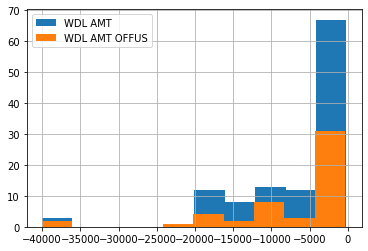

In [29]:
select = invest.WDL_AMT_tsr != invest.WDL_AMT_cog
(invest.WDL_AMT_tsr - invest.WDL_AMT_cog)[select].hist(label='WDL AMT')

select = invest.WDL_AMT_OFFUS_tsr != invest.WDL_AMT_OFFUS_cog
(invest.WDL_AMT_OFFUS_tsr - invest.WDL_AMT_OFFUS_cog)[select].hist(label='WDL AMT OFFUS')

plt.legend();

In [30]:
invest[(invest.WDL_AMT_OFFUS_tsr - invest.WDL_AMT_OFFUS_cog) <0 ]

,TID,WDL_AMT_OFFUS_tsr,WDL_AMT_tsr,DATE,file,WDL_AMT_cog,WDL_AMT_OFFUS_cog
297,91015024,65200,300300,2019-04-01,ATMTSR_april 01.pkl,307300,72200
549,91016720,207700,921500,2019-04-01,ATMTSR_april 01.pkl,922500,208700
1198,91018181,379400,2863800,2019-04-01,ATMTSR_april 01.pkl,2865800,381400
1570,91018858,233800,1373600,2019-04-01,ATMTSR_april 01.pkl,1374800,235000
1576,91018874,262600,915400,2019-04-01,ATMTSR_april 01.pkl,916600,263800
2089,91019870,275000,1320400,2019-04-01,ATMTSR_april 01.pkl,1320800,275400
67265,91010005,570800,1803000,2019-02-03,ATMTSR_february 03.pkl,1805800,573600
67635,91016152,8600,907000,2019-02-03,ATMTSR_february 03.pkl,911000,12600
67788,91016620,21100,893400,2019-02-03,ATMTSR_february 03.pkl,897400,25100
67813,91016736,144000,580500,2019-02-03,ATMTSR_february 03.pkl,581500,145000


In [31]:
df = pd.read_pickle('D:/BUDS_MID/ATM Forecasting/Mid/ATM TSR/2019'+'/ATMTSR_april 01.pkl')

In [36]:
df[df.TID=='91015024'].pivot_table(index=['STATUS_COD','TRAN_CODE'],values='AMT',aggfunc='sum')
# .to_csv('Checkme.csv')

AMT
STATUS_COD TRAN_CODE       
0          ADV        10000
           INQ            0
           OAR       122200
           WDL       293800
110        WDL          300
114        INQ            0
121        WDL         4000
400        REV         3500
701        INQ            0

In [40]:
+10000+293800

303800

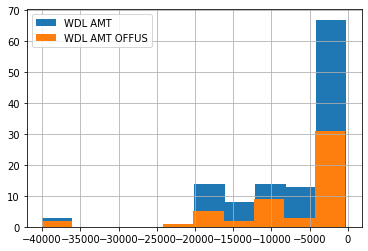

In [32]:
select = invest.WDL_AMT_tsr != invest.WDL_AMT_cog
(invest.WDL_AMT_tsr - invest.WDL_AMT_cog)[select].hist(label='WDL AMT')

select = invest.WDL_AMT_OFFUS_tsr != invest.WDL_AMT_OFFUS_cog
(invest.WDL_AMT_OFFUS_tsr - invest.WDL_AMT_OFFUS_cog)[select].hist(label='WDL AMT OFFUS')

plt.legend();

### Conclusion: Acceptable risk

### 2: Compare derived cog methodology to current methodology 2018, 2019 only

    Conclusion:
    derived cog methodology is okay -- possible differences:
        old > derived, derived is too low, old is prolly imputed
        
        old seems incorrect :(
        check csv[(csv.TID==91010479) & (csv.STATUS_COD==0) & (csv.TRAN_CODE.isin(['WDL','ADV']))].AMOUNT.sum() 

In [41]:
old = pd.read_csv('D:/BUDS_MID/OJT ATM/ATM Forecasting Data/Actual/finalagg_imputed_final_version.csv')

In [42]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705500 entries, 0 to 705499
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TID         705500 non-null  int64  
 1   DATE        705500 non-null  object 
 2   AMOUNT_SUM  705500 non-null  float64
 3   Unnamed: 0  705500 non-null  float64
 4   YEAR        705500 non-null  float64
 5   Duration    16381 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 32.3+ MB


In [43]:
old = old[['TID','DATE','AMOUNT_SUM']].copy()
old.rename(columns={'AMOUNT_SUM':'WDL_AMT'},inplace=True)
old.TID = old.TID.astype('str')
old.DATE = pd.to_datetime(old.DATE)

In [44]:
tsr = pd.concat(pd.read_pickle(raw+'ATMTSR_' + str(i) + '_WDL.pkl') for i in [2018,2019] )

In [45]:
tsr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050907 entries, 0 to 255943
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TID              1050907 non-null  object        
 1   WDL_AMT_OFFUS    1050907 non-null  float64       
 2   WDL_AMT_ONUS     1050907 non-null  float64       
 3   WDL_COUNT_OFFUS  1050907 non-null  float64       
 4   WDL_COUNT_ONUS   1050907 non-null  float64       
 5   WDL_AMT          1050907 non-null  float64       
 6   WDL_COUNT        1050907 non-null  float64       
 7   DATE             1050907 non-null  datetime64[ns]
 8   file             1050907 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 80.2+ MB


In [46]:
invest = tsr[['TID','DATE','WDL_AMT','file']].merge(old, on=['TID','DATE'], suffixes=['_tsr','_old'])

In [47]:
(invest.WDL_AMT_tsr - invest.WDL_AMT_old).describe(percentiles=np.array(range(0,100,5))/100)

count     389405
mean        6819
std       108343
min     -3430300
0%      -3430300
5%        -60000
10%       -37000
15%       -25300
20%       -18000
25%       -11900
30%        -7400
35%        -3500
40%         -500
45%            0
50%         2800
55%         6300
60%        10000
65%        13500
70%        18500
75%        23500
80%        30100
85%        39000
90%        51800
95%        76400
max      3638400
dtype: float64

In [48]:
invest[invest.WDL_AMT_tsr - invest.WDL_AMT_old <-3000000]

,TID,DATE,WDL_AMT_tsr,file,WDL_AMT_old
9645,91019468,2018-01-12,114000,ATMTSR_01 january 2018 _january 12.pkl,3364100
70877,91018917,2018-03-30,9000,ATMTSR_03 march 2018 _march 30.pkl,3260800
227178,91019492,2018-11-09,44100,ATMTSR_november 09.pkl,3474400
243982,91019330,2018-11-30,12800,ATMTSR_november 30.pkl,3260900
248154,91019764,2018-10-05,0,ATMTSR_october 05.pkl,3044000


In [73]:
csv = pd.read_csv('D:/BUDS OUT/ATM TSR/2019/ATMTSR_january 23.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104140 entries, 0 to 1104139
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   DATE        1104140 non-null  object 
 1   TID         1104140 non-null  int64  
 2   TIME        1104140 non-null  object 
 3   TRAN_CODE   1092723 non-null  object 
 4   APPL_CODE   926605 non-null   object 
 5   AMOUNT      1099606 non-null  float64
 6   STATUS_COD  1104140 non-null  float64
 7   SEQ         1099606 non-null  float64
 8   AR_ID       966874 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 75.8+ MB


In [74]:
csv[(csv.TID==91010479) & (csv.STATUS_COD==0) & (csv.TRAN_CODE.isin(['WDL','ADV']))].AMOUNT.sum() 

3663400.0

In [75]:
csv[(csv.TID==91010479) &  (csv.TRAN_CODE.isin(['WDL','ADV','REV']))].AMOUNT.sum()

4053000.0

In [76]:
pkl = pd.read_pickle('D:/BUDS_MID/ATM Forecasting/Mid/ATM TSR/2019/ATMTSR_january 23.pkl')
pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104140 entries, 0 to 1104139
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   DATE        1104140 non-null  object 
 1   TID         1104140 non-null  object 
 2   TIME        1104140 non-null  object 
 3   CARD_NO     1104140 non-null  object 
 4   JAI         1099606 non-null  float64
 5   TRAN_CODE   1104140 non-null  object 
 6   APPL_CODE   1104140 non-null  object 
 7   ACCOUNT_NU  966874 non-null   float64
 8   AMOUNT      1099606 non-null  float64
 9   CTR1        1099606 non-null  float64
 10  CTR2        1099606 non-null  float64
 11  CTR3        1099606 non-null  float64
 12  CTR4        1099606 non-null  float64
 13  STATUS_COD  1104140 non-null  float64
 14  RI          1104140 non-null  object 
 15  SEQ         1099606 non-null  float64
dtypes: float64(9), object(7)
memory usage: 134.8+ MB


In [77]:
pkl[(pkl.TID == '91010479') & (pkl.TRAN_CODE.isin(['WDL','ADV','REV'])) & (pkl.STATUS_COD.isin([0,400]))] \
#             .to_csv('Checkme.csv')
            

,DATE,TID,TIME,CARD_NO,JAI,TRAN_CODE,APPL_CODE,ACCOUNT_NU,AMOUNT,CTR1,CTR2,CTR3,CTR4,STATUS_COD,RI,SEQ
109155,2019-01-23,91010479,06:00A,00589559003292035402,0,WDL,SA,679187767,5000,0,0,0,0,0,0000,512033
109159,2019-01-23,91010479,06:21A,00589559004591198601,0,WDL,SA,679203452,700,0,0,0,0,0,0000,512037
109168,2019-01-23,91010479,06:44A,00589559005372523701,0,WDL,SA,679214136,2700,0,0,0,0,0,0000,512046
109174,2019-01-23,91010479,07:00A,00005210690288763116,1,WDL,BN,7190076430,5000,0,0,0,0,0,0000,512052
109176,2019-01-23,91010479,07:04A,00005102669041216290,9,WDL,BN,200410087604,1000,0,0,0,0,0,0000,512054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110028,2019-01-23,91010479,09:18P,00589559005497807401,0,WDL,SA,279241347,500,0,0,0,0,0,0000,512904
110030,2019-01-23,91010479,09:30P,00589559002560188801,0,WDL,SA,679178334,10000,0,0,0,0,0,0000,512906
110031,2019-01-23,91010479,09:31P,00589559002560188801,0,WDL,SA,679178334,5000,0,0,0,0,0,0000,512907
110032,2019-01-23,91010479,09:38P,00004748440100220216,1,WDL,BN,106121125,2000,0,0,0,0,0,0000,512908


### 3: Compare derived cog methodology to current methodology 2017 only

    Conclusion:
    derived cog methodology is okay -- possible differences:
        old > derived, derived is too low, old is prolly imputed

In [49]:
tsr = pd.concat(pd.read_pickle(raw+'ATMTSR_' + str(i) + '_WDL.pkl') for i in [2017] )
tsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782047 entries, 0 to 782046
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TID              782047 non-null  object        
 1   WDL_AMT_OFFUS    782047 non-null  float64       
 2   WDL_AMT_ONUS     782047 non-null  float64       
 3   WDL_COUNT_OFFUS  782047 non-null  float64       
 4   WDL_COUNT_ONUS   782047 non-null  float64       
 5   WDL_AMT          782047 non-null  float64       
 6   WDL_COUNT        782047 non-null  float64       
 7   DATE             782047 non-null  datetime64[ns]
 8   file             782047 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 53.7+ MB


In [50]:
invest = tsr[['TID','DATE','WDL_AMT']].merge(old, on=['TID','DATE'], suffixes=['_tsr','_old'])

In [51]:
(invest.WDL_AMT_tsr != invest.WDL_AMT_old).sum()
(invest.WDL_AMT_tsr == invest.WDL_AMT_old).sum()

267776

21150

count    288926
mean      28005
std       79188
min           0
0%            0
5%            0
10%         700
15%        1700
20%        3000
25%        4500
30%        6000
35%        7900
40%        9800
45%       11700
50%       14100
55%       16800
60%       19800
65%       22700
70%       26700
75%       31500
80%       37800
85%       46000
90%       58600
95%       83400
max     3614100
dtype: float64

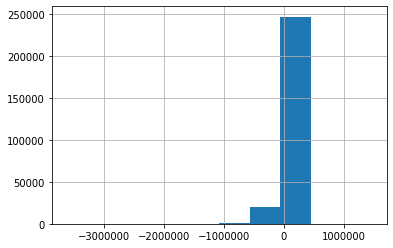

In [52]:
select = invest.WDL_AMT_tsr != invest.WDL_AMT_old
(invest.WDL_AMT_tsr - invest.WDL_AMT_old)[select].hist(label='WDL AMT');
abs(invest.WDL_AMT_tsr - invest.WDL_AMT_old).describe(percentiles=np.array(range(0,100,5))/100)

In [53]:
invest[abs(invest.WDL_AMT_tsr - invest.WDL_AMT_old)>1000000].head(100)

,TID,DATE,WDL_AMT_tsr,WDL_AMT_old
228,91017369,2017-01-01,0,2143900
579,91019507,2017-01-01,1700,1722000
1794,91018817,2017-01-03,1000,1148000
1923,91019525,2017-01-03,27200,1103200
1924,91019527,2017-01-03,0,2745100
2103,91010479,2017-01-04,520100,2173500
2274,91017735,2017-01-04,25100,1917600
2435,91018551,2017-01-04,0,2121000
2611,91019527,2017-01-04,0,3083500
2633,91019634,2017-01-04,58600,1873900


In [113]:
pkl=pd.read_pickle('D:/BUDS_MID/ATM Forecasting/Mid/ATM TSR/2017/' + 'ATMTSR_01 january 2017 _january 01.pkl')

In [114]:
pkl[pkl.TID=='91017369'].AMOUNT.sum()

4000.0

In [115]:
pkl[(pkl.TID =='91017369') & (pkl.TRAN_CODE.isin(['WDL','ADV','REV','PEN'])) & (pkl.STATUS_COD.isin([0,400]))] \
#     .AMOUNT.sum()

,DATE,TID,TIME,CARD_NO,JAI,TRAN_CODE,APPL_CODE,ACCOUNT_NU,AMOUNT,CTR1,CTR2,CTR3,CTR4,STATUS_COD,RI,SEQ
258267,2017-01-01,91017369,10:47A,,0,WDL,SA,3279108891,2000,0,0,0,0,0,0000,842736
258268,2017-01-01,91017369,10:47A,,0,REV,SA,3279108891,2000,0,0,0,0,400,0103,842736


In [118]:
pkl[(pkl.TID.str[4:]=='7369')].head(100)

,DATE,TID,TIME,CARD_NO,JAI,TRAN_CODE,APPL_CODE,ACCOUNT_NU,AMOUNT,CTR1,CTR2,CTR3,CTR4,STATUS_COD,RI,SEQ
258263,2017-01-01,91017369,03:17A,,0,INQ,SA,1359712002,0,0,0,0,0,111,0000,842732
258264,2017-01-01,91017369,03:18A,,0,INQ,SA,1359712002,0,0,0,0,0,111,0000,842733
258265,2017-01-01,91017369,06:23A,,0,INQ,SA,1359712002,0,0,0,0,0,111,0000,842734
258266,2017-01-01,91017369,06:24A,,0,INQ,SA,1359712002,0,0,0,0,0,111,0000,842735
258267,2017-01-01,91017369,10:47A,,0,WDL,SA,3279108891,2000,0,0,0,0,0,0000,842736
258268,2017-01-01,91017369,10:47A,,0,REV,SA,3279108891,2000,0,0,0,0,400,0103,842736
258269,2017-01-01,91017369,11:58A,,9,INQ,BN,nan,0,0,0,0,0,910,0000,842737
258270,2017-01-01,91017369,01:47P,,0,INQ,SA,9829236068,0,0,0,0,0,0,0000,842738
258271,2017-01-01,91017369,01:59P,,0,INQ,SA,1169037325,0,0,0,0,0,0,0000,842739
258272,2017-01-01,91017369,09:45P,,2,INQ,BN,nan,0,0,0,0,0,910,0000,842740


In [108]:
pkl=pd.read_pickle('D:/BUDS_MID/ATM Forecasting/Mid/ATM TSR/2017/' + 'ATMTSR_01 january 2017 _january 02.pkl')

In [109]:
pkl[(pkl.TID =='91017369') & (pkl.TRAN_CODE.isin(['WDL','ADV','REV','PEN'])) & (pkl.STATUS_COD.isin([0,400]))] \

,DATE,TID,TIME,CARD_NO,JAI,TRAN_CODE,APPL_CODE,ACCOUNT_NU,AMOUNT,CTR1,CTR2,CTR3,CTR4,STATUS_COD,RI,SEQ
488802,2017-01-02,91017369,03:15P,,0,WDL,SA,1899764249,700,0,0,0,0,0,0000,842756
488806,2017-01-02,91017369,03:21P,,0,WDL,SA,2589019213,500,0,0,0,0,0,0000,842760
488808,2017-01-02,91017369,03:22P,,0,WDL,SA,1439018492,2600,0,0,0,0,0,0000,842762
488809,2017-01-02,91017369,03:22P,,0,REV,SA,1439018492,2600,0,0,0,0,400,0103,842762
488810,2017-01-02,91017369,03:23P,,0,WDL,SA,3989075003,2900,0,0,0,0,0,0000,842763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489019,2017-01-02,91017369,08:56P,,0,WDL,SA,3789105307,4500,0,0,0,0,0,0000,842974
489020,2017-01-02,91017369,09:01P,,0,WDL,SA,3949078778,1200,0,0,0,0,0,0000,842975
489021,2017-01-02,91017369,09:03P,,0,WDL,SA,1899504751,1500,0,0,0,0,0,0000,842976
489022,2017-01-02,91017369,09:11P,,0,WDL,SA,4159148683,1000,0,0,0,0,0,0000,842977
